In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ahmedabad_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,supercity honor,science city,2.75,14620.0,1881.0,Plot area 209(174.75 sq.m.)Built Up area: 271 ...,4,4,1,...,NaN,271.0,NaN,1,0,1,1,0,0,2
1,house,on request,science city,3.50,14141.0,2475.0,Plot area 240(200.67 sq.m.)Built Up area: 275 ...,4,4,1,...,NaN,275.0,200.0,1,0,1,1,0,2,2
2,house,ashapura divyapunj bungalows,ranipndkheda,2.60,7222.0,3600.0,Plot area 400(334.45 sq.m.)Built Up area: 450 ...,4,4,1,...,NaN,450.0,400.0,0,0,1,0,0,0,2
3,flat,mallinath park,paldi,0.63,6363.0,990.0,Carpet area: 990 (91.97 sq.m.),2,2,2,...,NaN,NaN,990.0,0,0,1,0,0,0,2
4,flat,olive greens,gota,1.30,8666.0,1500.0,Carpet area: 1500 (139.35 sq.m.),3,3,1,...,NaN,NaN,1500.0,0,0,0,0,1,0,2


In [4]:
df.shape

(4060, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        4060 non-null   object 
 1   society              4060 non-null   object 
 2   sector               4060 non-null   object 
 3   price                4052 non-null   float64
 4   price_per_sqft       4051 non-null   float64
 5   area                 4051 non-null   float64
 6   areaWithType         4060 non-null   object 
 7   bedRoom              4060 non-null   int64  
 8   bathroom             4060 non-null   int64  
 9   balcony              4060 non-null   object 
 10  floorNum             4004 non-null   float64
 11  facing               2596 non-null   object 
 12  agePossession        4060 non-null   object 
 13  super_built_up_area  1003 non-null   float64
 14  built_up_area        2287 non-null   float64
 15  carpet_area          1871 non-null   f

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,supercity honor,science city,2.75,14620.0,1881.0,Plot area 209(174.75 sq.m.)Built Up area: 271 ...,4,4,1,...,NaN,271.0,NaN,1,0,1,1,0,0,2
1,house,on request,science city,3.50,14141.0,2475.0,Plot area 240(200.67 sq.m.)Built Up area: 275 ...,4,4,1,...,NaN,275.0,200.0,1,0,1,1,0,2,2
2,house,ashapura divyapunj bungalows,ranipndkheda,2.60,7222.0,3600.0,Plot area 400(334.45 sq.m.)Built Up area: 450 ...,4,4,1,...,NaN,450.0,400.0,0,0,1,0,0,0,2
3,flat,mallinath park,paldi,0.63,6363.0,990.0,Carpet area: 990 (91.97 sq.m.),2,2,2,...,NaN,NaN,990.0,0,0,1,0,0,0,2
4,flat,olive greens,gota,1.30,8666.0,1500.0,Carpet area: 1500 (139.35 sq.m.),3,3,1,...,NaN,NaN,1500.0,0,0,0,0,1,0,2


### property_type

<Axes: xlabel='property_type'>

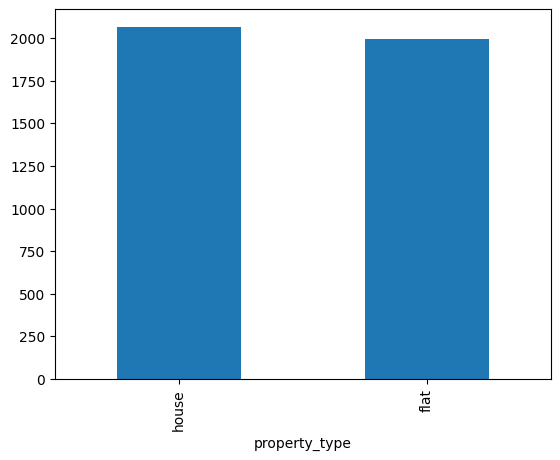

In [9]:
df['property_type'].value_counts().plot(kind='bar',)

#### Observations

- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

### society

In [10]:
df['society'].value_counts().shape

(2030,)

In [11]:
df['society'].value_counts()

society
independent                  880
on request                    92
olive greens                  37
goyal orchid legacy           36
shaligram prime               28
                            ... 
navkar kalasagar heights       1
shyamal 3                      1
shyam 2                        1
sudarshan gold apartments      1
vraj poonam pride              1
Name: count, Length: 2030, dtype: int64

In [12]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
on request                0.028940
olive greens              0.040579
goyal orchid legacy       0.051903
shaligram prime           0.060711
godrej garden city        0.068575
                            ...   
vir savarkar heights 2    0.218622
pinecrest apartments      0.220195
aamramanjari bunglows     0.221453
suramya seven             0.222712
shreem umang vatva        0.223970
Name: proportion, Length: 75, dtype: float64

In [13]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 1,
 'Average (10-49)': 15,
 'Low (2-9)': 434,
 'Very Low (1)': 1579}

<Axes: xlabel='society'>

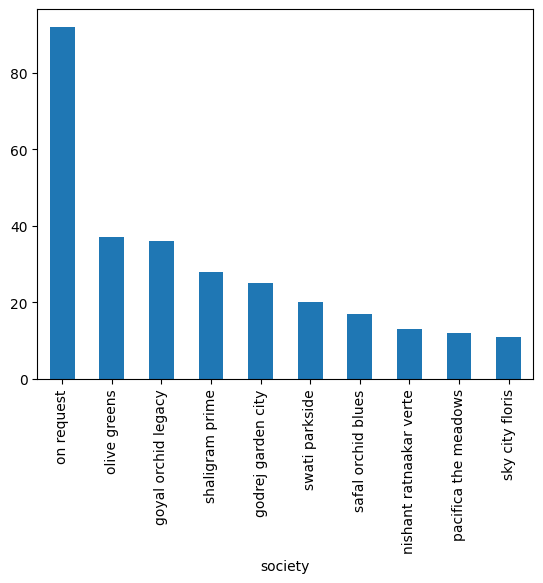

In [14]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [15]:
df['society'].isnull().sum()

0

In [16]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


#### Observations

- Around 13% properties comes under independent tag.
- There are 675 societies. 
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 273 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [19]:
# unique sectors
df['sector'].value_counts()

sector
shela               254
south bopal         228
gota                174
thaltej             149
science city        139
                   ... 
pushpkunj             3
janta nagar           3
shanti nagar          3
thakkarbapanagar      3
ellisbridge           3
Name: count, Length: 152, dtype: int64

<Axes: xlabel='sector'>

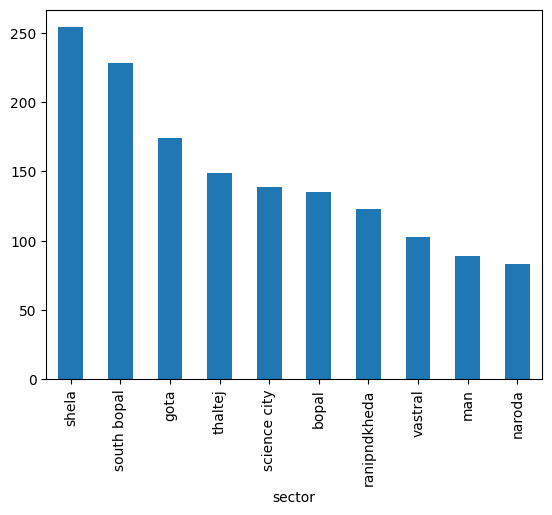

In [18]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [20]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 8,
 'High (50-100)': 15,
 'Average (10-49)': 60,
 'Low (2-9)': 69,
 'Very Low (1)': 0}

#### Observations

- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 16 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Price

In [21]:
df['price'].isnull().sum()

8

In [22]:
df['price'].describe()

count    4051.000000
mean        1.785228
std         2.304644
min         0.070000
25%         0.520000
50%         0.850000
75%         2.210000
max        27.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

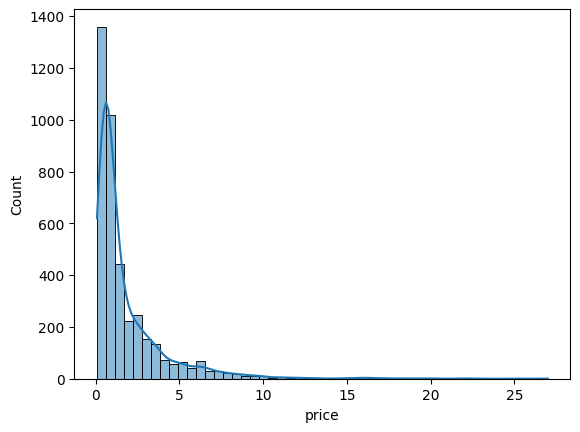

In [23]:
sns.histplot(df['price'], kde=True, bins=50)

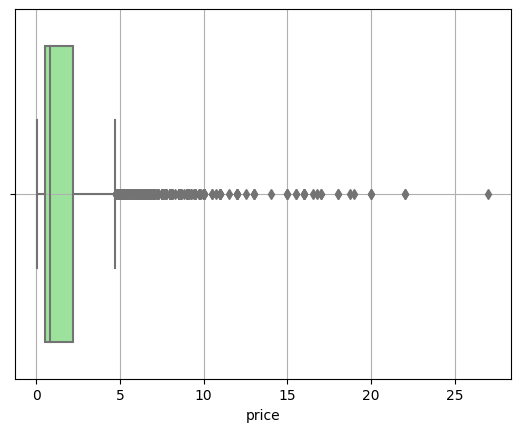

In [24]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
 

- Missing Values: There are 17 missing values in the price column.

In [25]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.421592420457027 17.65104983254843


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [26]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.150
0.05     0.250
0.95     6.475
0.99    11.000
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [27]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.69

In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-2.015 4.745


In [29]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(368, 23)

In [30]:
outliers['price'].describe()

count    368.000000
mean       7.594212
std        3.273940
min        4.750000
25%        5.500000
50%        6.500000
75%        8.500000
max       27.000000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

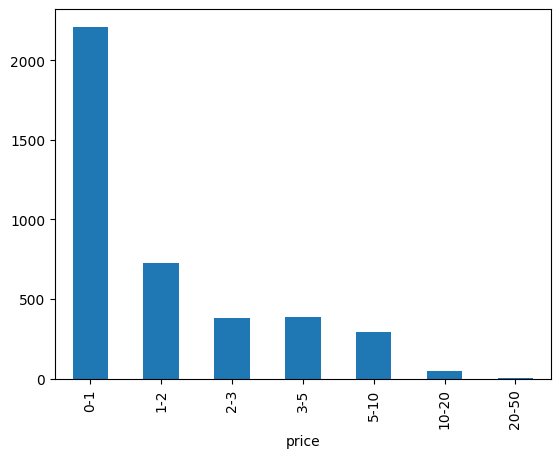

In [31]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

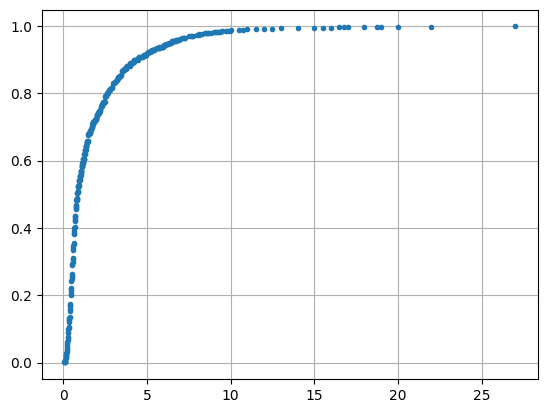

In [32]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

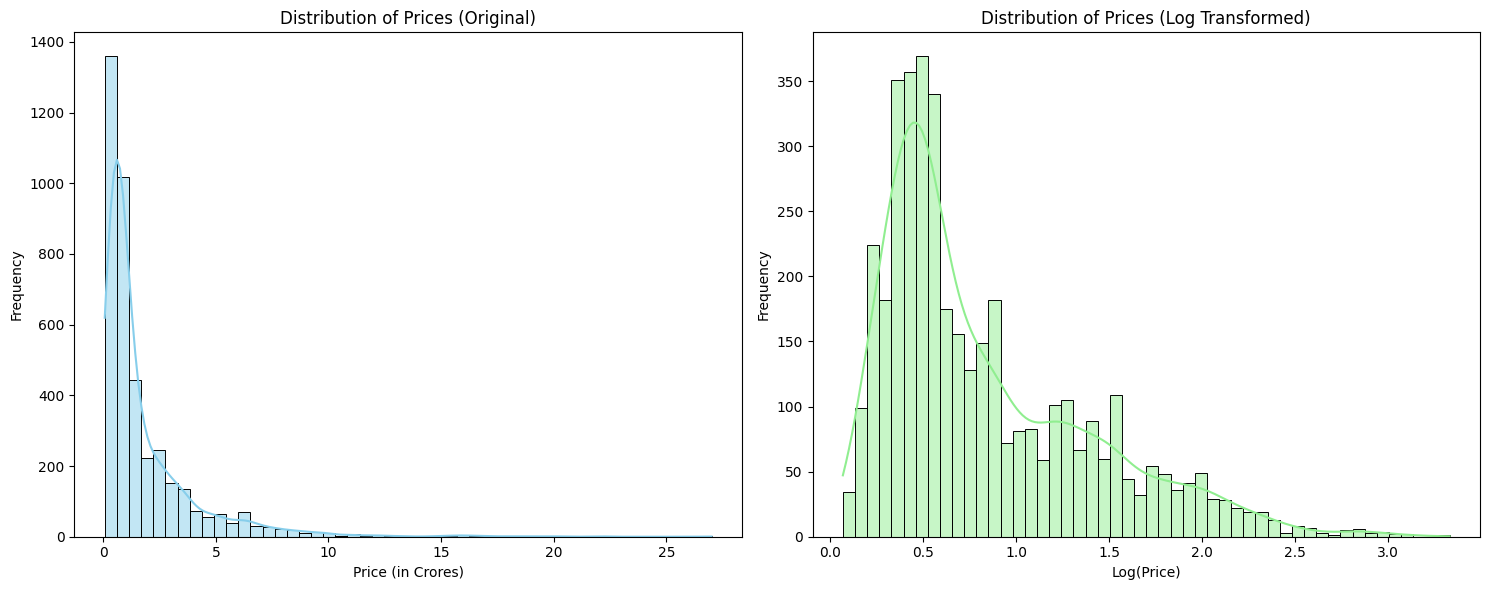

In [33]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. 
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [34]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.1872140727454137 0.9021963580931844


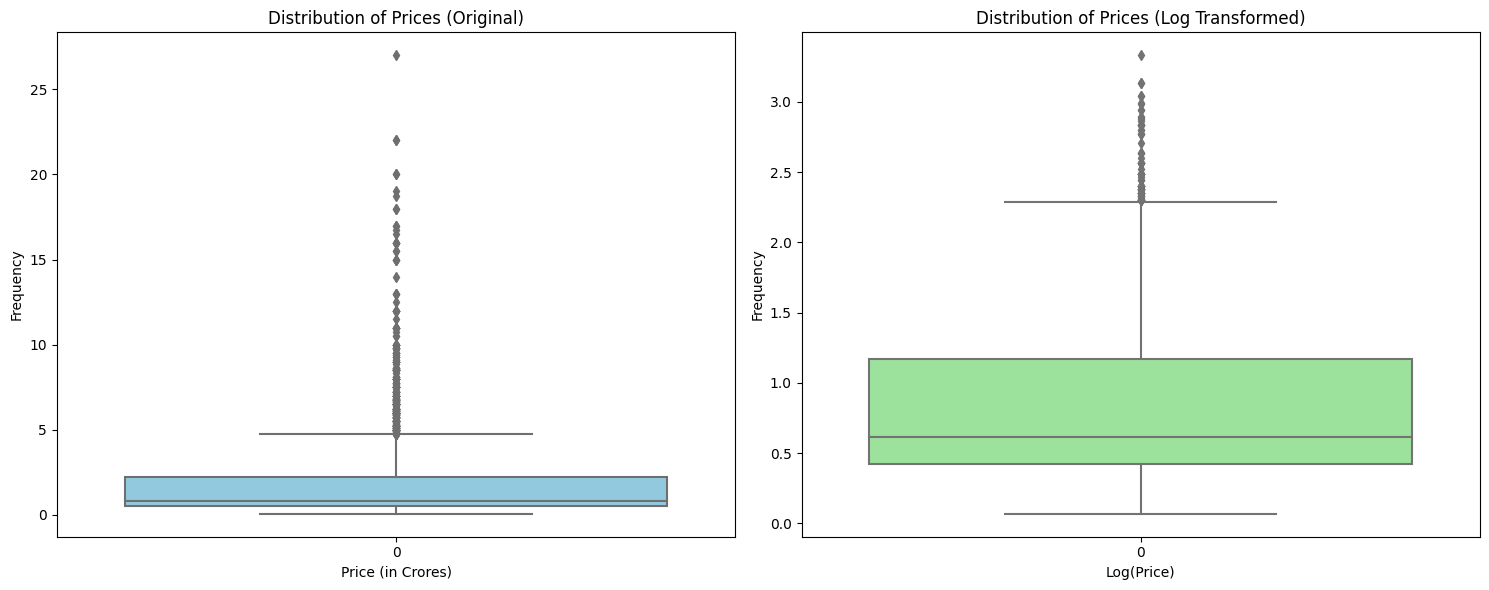

In [35]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [36]:
df['price_per_sqft'].isnull().sum()

9

In [37]:
df['price_per_sqft'].describe()

count    4.050000e+03
mean     1.922860e+04
std      1.830367e+05
min      2.000000e+00
25%      4.701750e+03
50%      7.121000e+03
75%      1.241700e+04
max      8.100000e+06
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

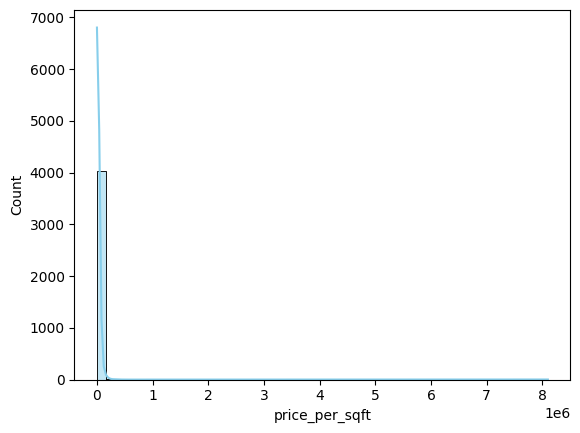

In [38]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: >

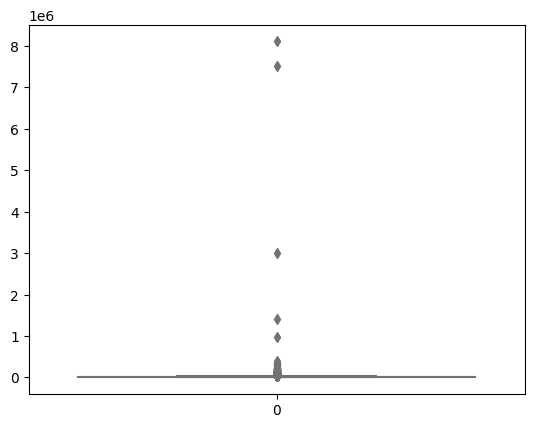

In [39]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values

### bedRoom

In [40]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

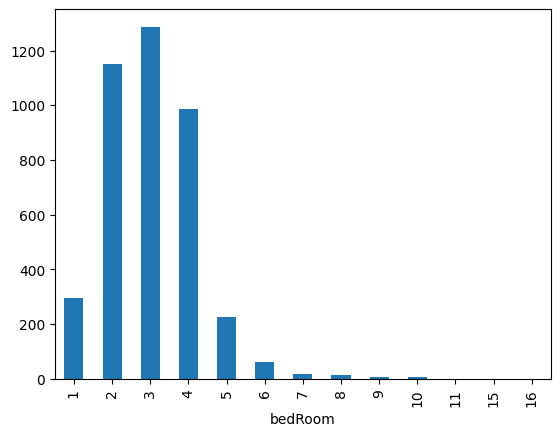

In [41]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

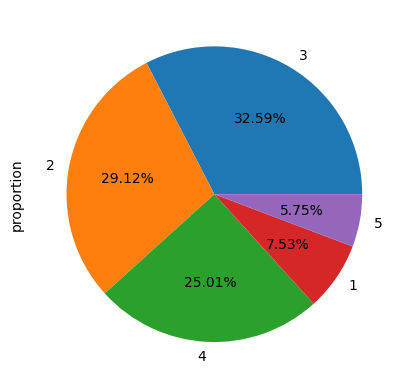

In [42]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [43]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

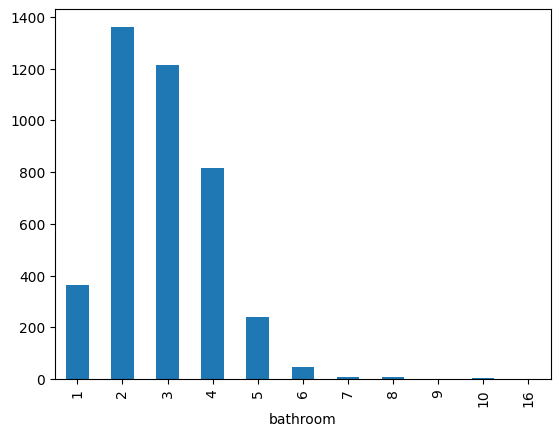

In [44]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

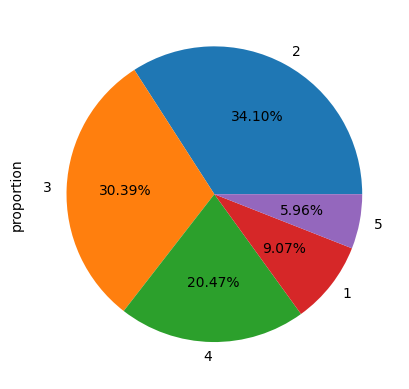

In [45]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [46]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,supercity honor,science city,2.75,14620.0,1881.0,Plot area 209(174.75 sq.m.)Built Up area: 271 ...,4,4,1,...,NaN,271.0,NaN,1,0,1,1,0,0,2
1,house,on request,science city,3.50,14141.0,2475.0,Plot area 240(200.67 sq.m.)Built Up area: 275 ...,4,4,1,...,NaN,275.0,200.0,1,0,1,1,0,2,2
2,house,ashapura divyapunj bungalows,ranipndkheda,2.60,7222.0,3600.0,Plot area 400(334.45 sq.m.)Built Up area: 450 ...,4,4,1,...,NaN,450.0,400.0,0,0,1,0,0,0,2
3,flat,mallinath park,paldi,0.63,6363.0,990.0,Carpet area: 990 (91.97 sq.m.),2,2,2,...,NaN,NaN,990.0,0,0,1,0,0,0,2
4,flat,olive greens,gota,1.30,8666.0,1500.0,Carpet area: 1500 (139.35 sq.m.),3,3,1,...,NaN,NaN,1500.0,0,0,0,0,1,0,2


### balcony

In [47]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

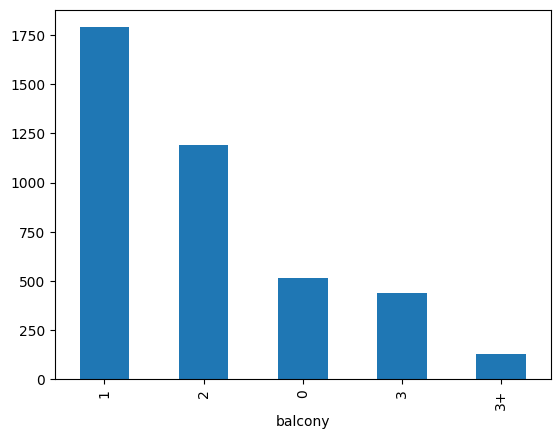

In [48]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

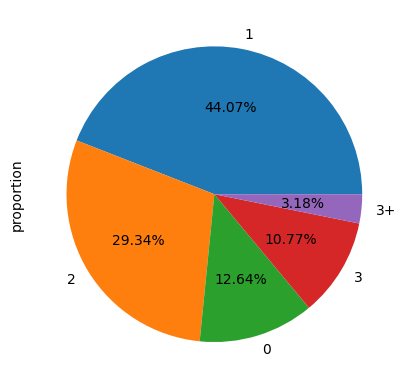

In [49]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [50]:
### floorNum

In [51]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,3.0,East,Relatively New,NaN,271.0,NaN,1,0,1,1,0,0,2
1,2.0,East,Relatively New,NaN,275.0,200.0,1,0,1,1,0,2,2
2,3.0,East,Relatively New,NaN,450.0,400.0,0,0,1,0,0,0,2
3,1.0,East,Old Property,NaN,NaN,990.0,0,0,1,0,0,0,2
4,7.0,East,Relatively New,NaN,NaN,1500.0,0,0,0,0,1,0,2


In [52]:
df['floorNum'].isnull().sum()

56

In [53]:
df['floorNum'].describe()

count    4003.000000
mean        3.452161
std         3.186349
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        76.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

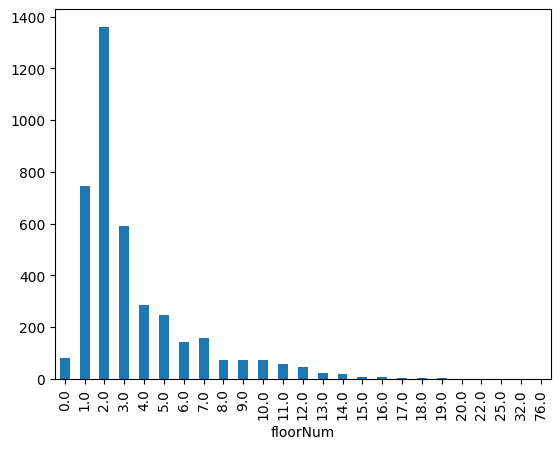

In [54]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

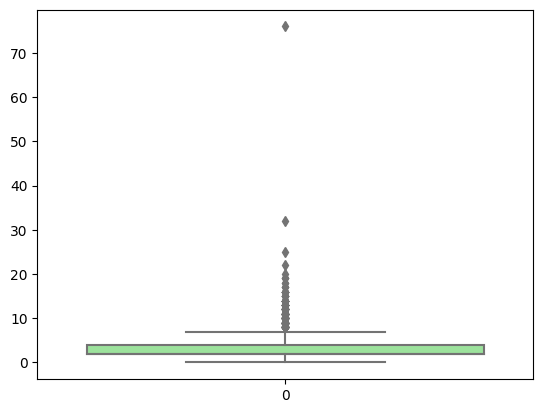

In [55]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing

In [56]:
df['facing'].isnull().sum()

1464

In [57]:
df['facing'].fillna('NA',inplace=True)

In [58]:
df['facing'].value_counts()

facing
NA            1464
East          1086
West           430
North-East     339
North          256
North-West     142
South          123
South-East     119
South-West     100
Name: count, dtype: int64

### agePossession

In [59]:
df['agePossession'].isnull().sum()

0

In [60]:
df['agePossession'].value_counts()

agePossession
Relatively New        1228
Old Property          1033
Moderately Old         911
Undefined              499
New Property           313
Under Construction      75
Name: count, dtype: int64

### areas

In [61]:
# super built up area
df['super_built_up_area'].isnull().sum()

3056

In [62]:
df['super_built_up_area'].describe()

count    1003.000000
mean     1439.735543
std      1096.490610
min        53.550000
25%       900.000000
50%      1305.000000
75%      1844.000000
max      8110.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

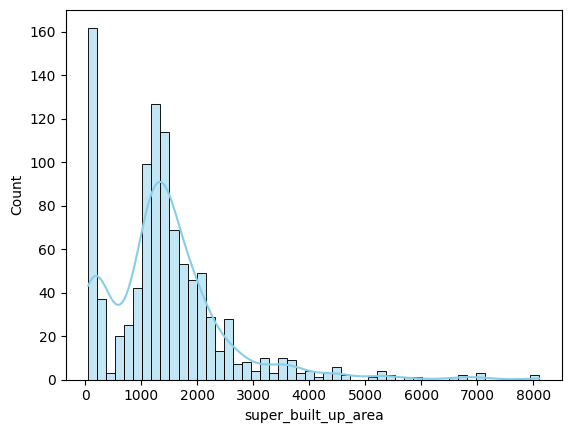

In [63]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

In [66]:
# sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [67]:
# built up area
df['built_up_area'].isnull().sum()

1772

In [68]:
df['built_up_area'].describe()

count    2.287000e+03
mean     4.398638e+03
std      1.463578e+05
min      1.000000e+00
25%      2.900000e+02
50%      9.000000e+02
75%      1.792500e+03
max      7.000000e+06
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

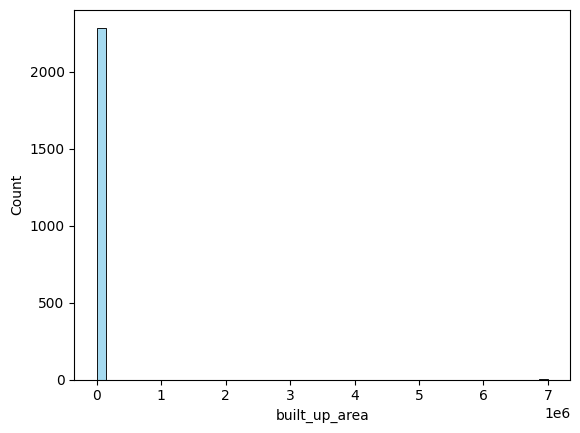

In [69]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: >

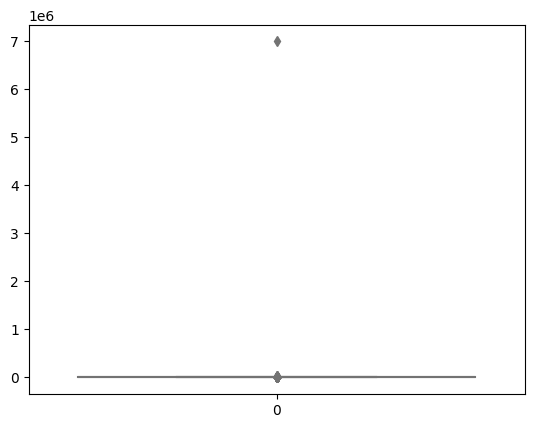

In [70]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.


The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [71]:
# carpet area
df['carpet_area'].isnull().sum()

2189

In [72]:
df['carpet_area'].describe()

count      1870.000000
mean       1100.038920
std        5346.857676
min           1.000000
25%         174.250000
50%         739.500000
75%        1190.000000
max      181848.017575
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

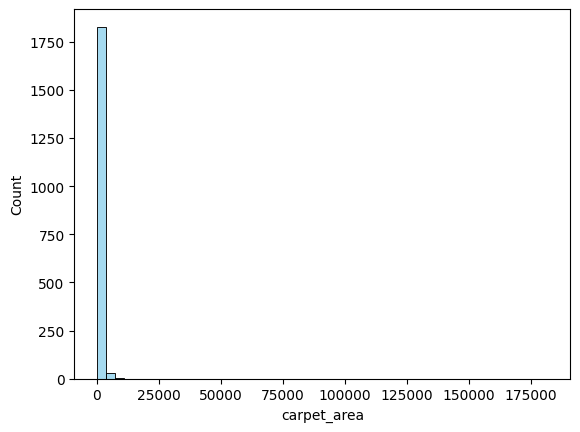

In [73]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

In [78]:
# sns.boxplot(df['carpet_area'].dropna(), color='skyblue')

In [79]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,1,0,1,1,0,0,2
1,1,0,1,1,0,2,2
2,0,0,1,0,0,0,2
3,0,0,1,0,0,0,2
4,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...
4055,0,0,1,0,0,1,2
4056,0,0,0,0,0,0,2
4057,0,0,0,0,0,0,2
4058,0,0,0,0,0,2,2


### additional rooms

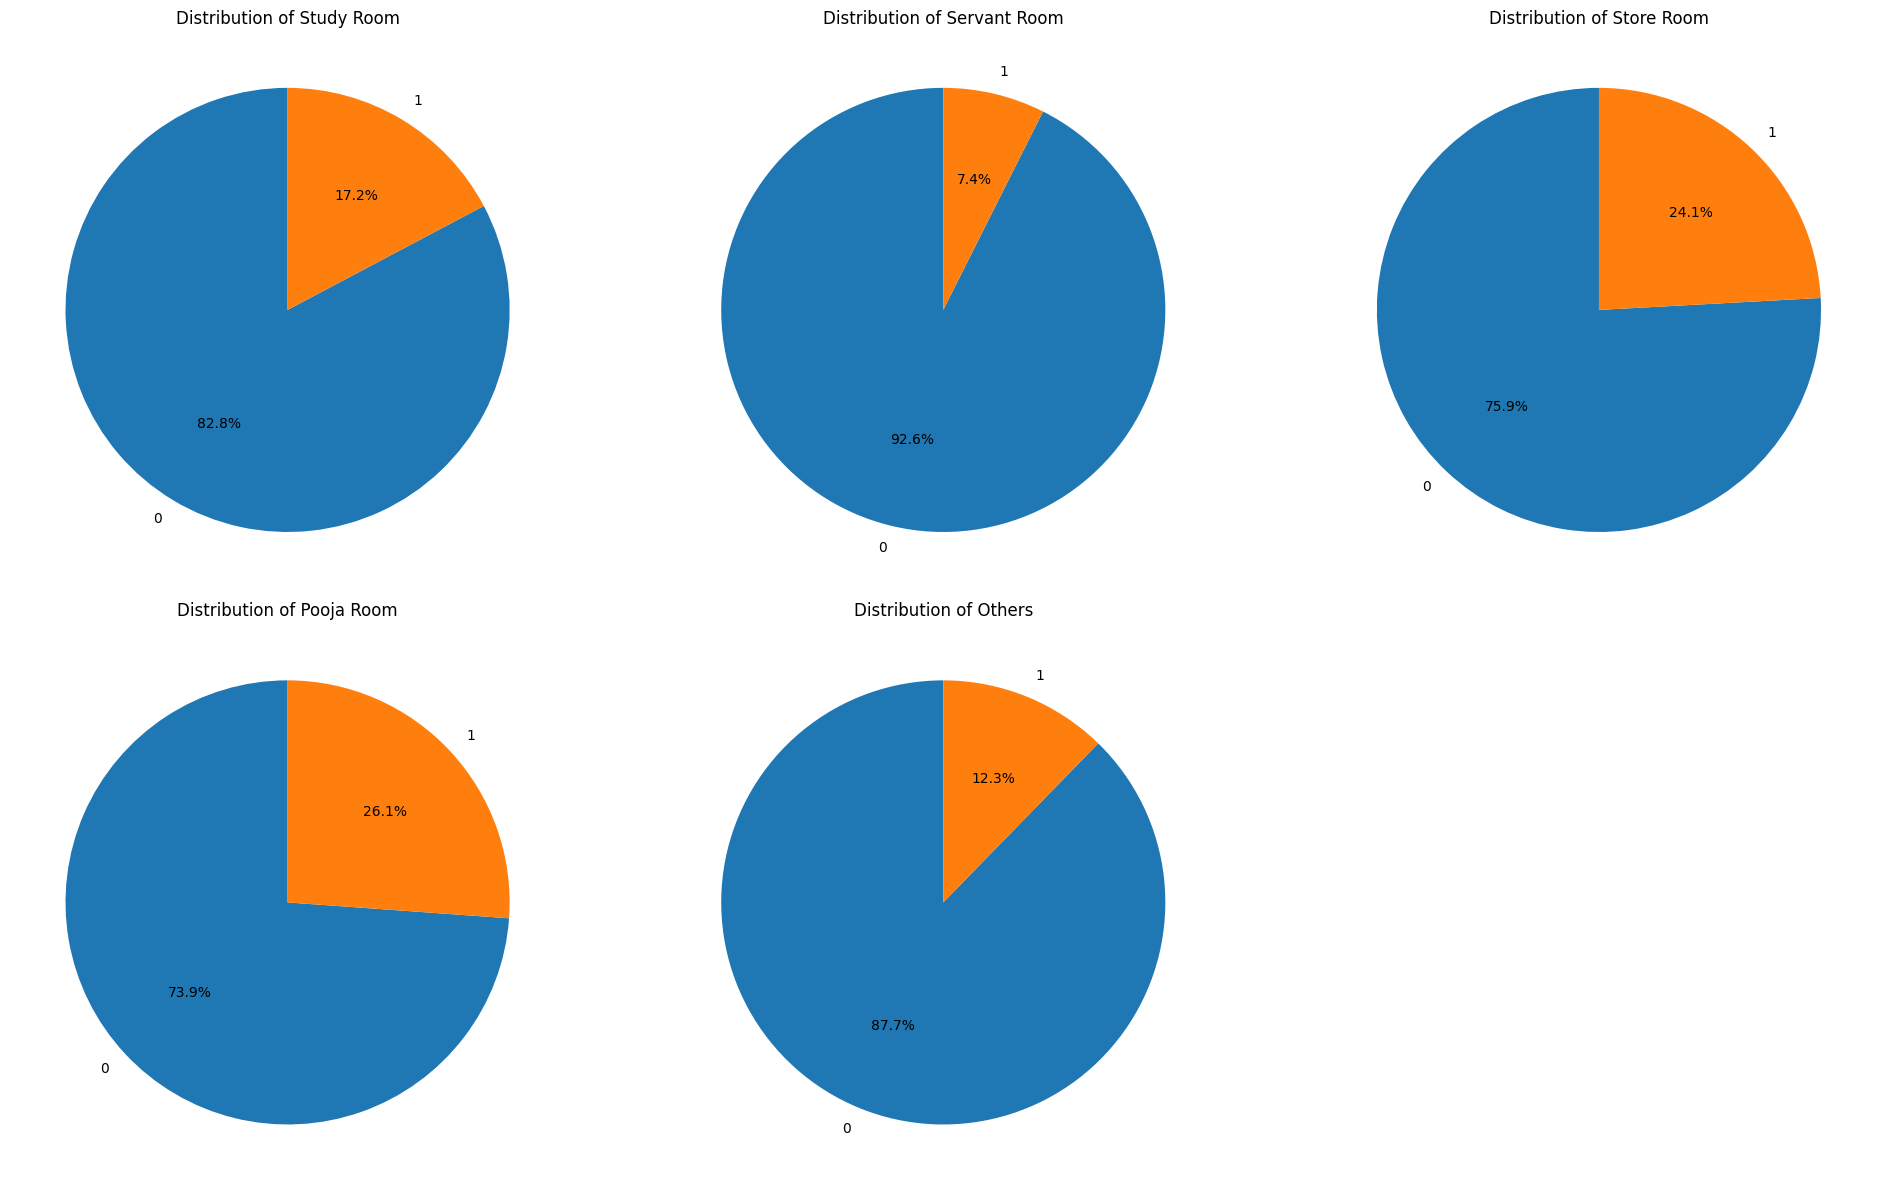

In [80]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [81]:
df['furnishing_type'].value_counts()

furnishing_type
0    2820
2     746
1     493
Name: count, dtype: int64

<Axes: ylabel='count'>

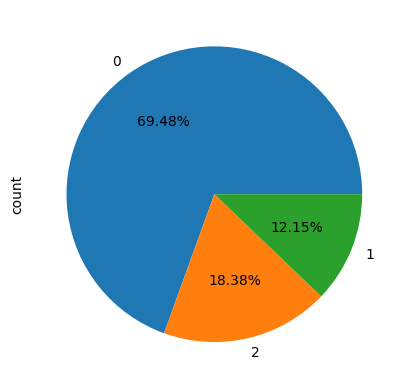

In [82]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [83]:
df['luxury_score'].isnull().sum()

0

In [84]:
df['luxury_score'].describe()

count    4059.0
mean        2.0
std         0.0
min         2.0
25%         2.0
50%         2.0
75%         2.0
max         2.0
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

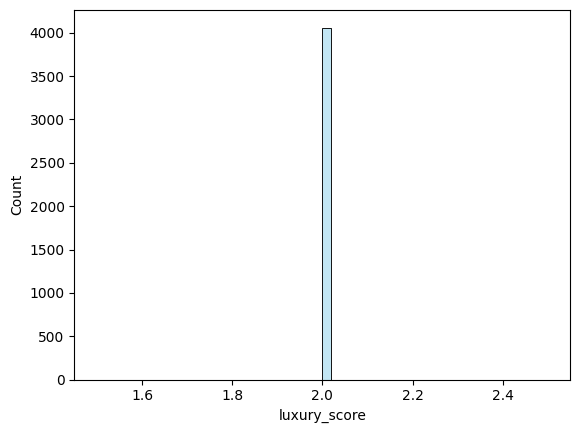

In [85]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

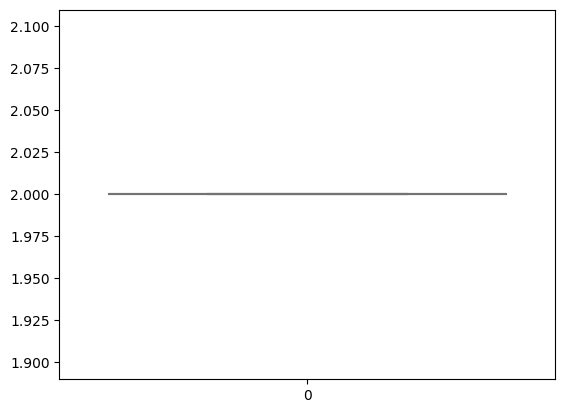

In [86]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [87]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,supercity honor,science city,2.75,14620.0,1881.0,Plot area 209(174.75 sq.m.)Built Up area: 271 ...,4,4,1,...,NaN,271.0,NaN,1,0,1,1,0,0,2
1,house,on request,science city,3.50,14141.0,2475.0,Plot area 240(200.67 sq.m.)Built Up area: 275 ...,4,4,1,...,NaN,275.0,200.0,1,0,1,1,0,2,2
2,house,ashapura divyapunj bungalows,ranipndkheda,2.60,7222.0,3600.0,Plot area 400(334.45 sq.m.)Built Up area: 450 ...,4,4,1,...,NaN,450.0,400.0,0,0,1,0,0,0,2
3,flat,mallinath park,paldi,0.63,6363.0,990.0,Carpet area: 990 (91.97 sq.m.),2,2,2,...,NaN,NaN,990.0,0,0,1,0,0,0,2
4,flat,olive greens,gota,1.30,8666.0,1500.0,Carpet area: 1500 (139.35 sq.m.),3,3,1,...,NaN,NaN,1500.0,0,0,0,0,1,0,2
